<p>Here, we try to simplify part of the code by implementing a simple and multi-layered neural network to have mentality.</p>

* Train
* Test
* Save Weights

##### In all stages, we will use the existing dataset called </br>```train.csv``` for train network </br> ```test.csv``` for test and validate 
##### custom MNIST dataset

#### imports 

In [1]:
import numpy as np # matrix cals
import pandas as pd # data analys
from matplotlib import pyplot as plt # data Visualing
import json # for save json format

In [2]:
dataset = pd.read_csv('train.csv') # load Train DataSet

In [3]:
dataset = np.array(dataset)
np.random.shuffle(dataset) # shuffle before splitting into dev and training sets

In [4]:
dataset.shape

(42000, 785)

#### split train and test sets

In [5]:
tests = dataset[:1000].T # transpose Matrix | 1000 image test (785 row and 0-999 col)
testY = tests[0] # split labels
testX = tests[1:] # choise image data
testX = testX / 255. # normalize

In [6]:
trains = dataset[1000:].T # transpose Matrix | learning 41000 image (1000 to 42000 col)
trainY = trains[0] # choise label
trainX = trains[1:] # choise image data
trainX = trainX / 255.  # normalize

In [7]:
(testX.shape, trainX.shape)

((784, 1000), (784, 41000))

### MLP

In [8]:
def init_params():
    # each row = node
    W1 = np.random.rand(100, 784) - 0.5  # 100 row and 784 col
    b1 = np.random.rand(100, 1) - 0.5  # 100 row and 1 col
    W2 = np.random.rand(10, 100) - 0.5  # 10 row and 100 col
    b2 = np.random.rand(10, 1) - 0.5  # 10 row and 1 col
    return W1, b1, W2, b2

In [9]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [10]:
def softmax(Z):
    return  np.exp(Z) / sum(np.exp(Z))

In [11]:
def ReLU_deriv(Z):
    return Z > 0

In [12]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

In [13]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / dataset.shape[0] * dZ2.dot(A1.T)
    db2 = 1 / dataset.shape[0] * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / dataset.shape[0] * dZ1.dot(X.T)
    db1 = 1 / dataset.shape[0] * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [14]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learningRate):
    W1 = W1 - learningRate * dW1
    b1 = b1 - learningRate * db1    
    W2 = W2 - learningRate * dW2  
    b2 = b2 - learningRate * db2    
    return W1, b1, W2, b2

In [15]:
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [16]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [17]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [18]:
def gradient_descent(X, Y, learningRate, epoch):
    W1, b1, W2, b2 = init_params()
    for i in range(epoch):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learningRate)
        if i % 10 == 0:
            print("epoch: ", i)
            predictions = get_predictions(A2)
            print("Acrcy: ",get_accuracy(predictions, Y))
    return W1, b1, W2, b2

### Train

In [19]:
epoch = 200

In [20]:
W1, b1, W2, b2 = gradient_descent(trainX, trainY, 0.10, epoch)

epoch:  0
Acrcy:  0.08724390243902438
epoch:  10
Acrcy:  0.3848536585365854
epoch:  20
Acrcy:  0.5304390243902439
epoch:  30
Acrcy:  0.6049024390243902
epoch:  40
Acrcy:  0.6538048780487805
epoch:  50
Acrcy:  0.6873902439024391
epoch:  60
Acrcy:  0.7138292682926829
epoch:  70
Acrcy:  0.7348292682926829
epoch:  80
Acrcy:  0.7529512195121951
epoch:  90
Acrcy:  0.7675365853658537
epoch:  100
Acrcy:  0.7797804878048781
epoch:  110
Acrcy:  0.7897804878048781
epoch:  120
Acrcy:  0.7988536585365854
epoch:  130
Acrcy:  0.8063902439024391
epoch:  140
Acrcy:  0.8123902439024391
epoch:  150
Acrcy:  0.8187560975609756
epoch:  160
Acrcy:  0.8241951219512195
epoch:  170
Acrcy:  0.8292195121951219
epoch:  180
Acrcy:  0.8344390243902439
epoch:  190
Acrcy:  0.8384878048780487


### predictions

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [22]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = trainX[:, index, None]
    prediction = make_predictions(trainX[:, index, None], W1, b1, W2, b2)
    label = trainY[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


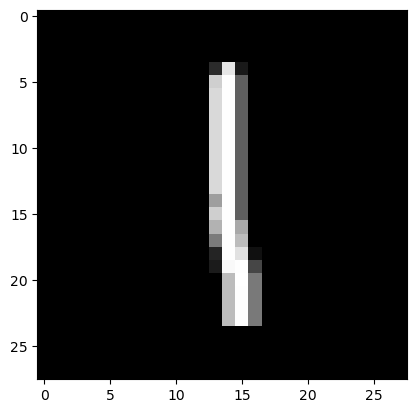

In [23]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [6]
Label:  6


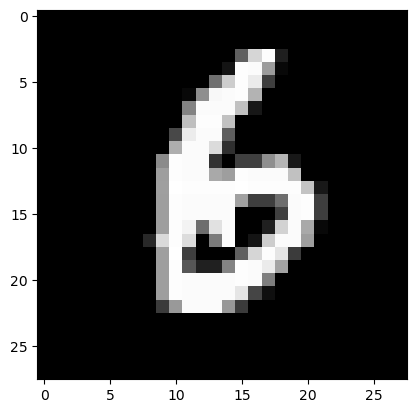

In [24]:
test_prediction(3, W1, b1, W2, b2)

Prediction:  [8]
Label:  8


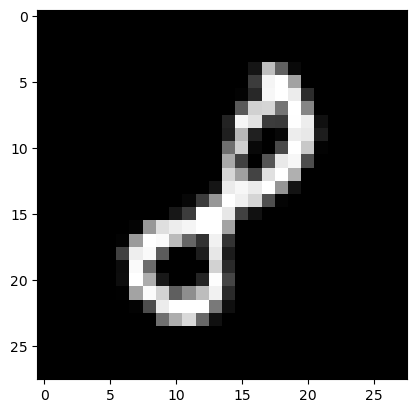

In [25]:
test_prediction(2, W1, b1, W2, b2)

Prediction:  [8]
Label:  8


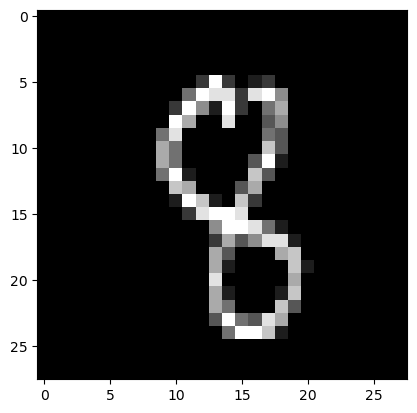

In [26]:
test_prediction(4, W1, b1, W2, b2)

In [27]:
get_accuracy(make_predictions(testX, W1, b1, W2, b2), testY)

0.823

### accuracy for each number : 

In [28]:
dataset = pd.read_csv('train.csv') # load Train DataSet

In [29]:
for i in range(10):
    values = np.array(dataset[:1000].query(f'label == {i}').T)   # peak vals
    valueY = values[0]
    valueX = values[1:] # choise image data
    valueX = valueX / 255.  # normalize
    print(f"Accuracy {i} : ",get_accuracy(make_predictions(valueX, W1, b1, W2, b2), valueY))

Accuracy 0 :  0.9439252336448598
Accuracy 1 :  0.9270833333333334
Accuracy 2 :  0.7983870967741935
Accuracy 3 :  0.8888888888888888
Accuracy 4 :  0.7843137254901961
Accuracy 5 :  0.7191011235955056
Accuracy 6 :  0.8762886597938144
Accuracy 7 :  0.8761904761904762
Accuracy 8 :  0.7311827956989247
Accuracy 9 :  0.7938144329896907


### save Weights

In [30]:
res = {
	"w1": W1.tolist(),
	"w2": W2.tolist(),
    "b1": b1.tolist(),
	"b2": b2.tolist()
}
json_object = json.dumps(res, indent=4)
with open("wgts\simpleMLPWghts.json", "w") as outfile:
	outfile.write(json_object)